# Andres_Oliden's_Final_Project

# 10 Decemeber 2019


### Brief Overview

- I will be analyzing a dataset from the 2016 Baseball Season about different aspects from each game.


- Goal 1
    - My first goal is to fit a linear regression to the data to see if there is any correlation with fan attendance per games and the weather during the game


- Goal 2
    - My second goal is to fit a logisitic regression to the data to see I am able to predict if the Home Team wins
    
    
   

### The first step is to import my dataset from my csv file and turn into a Panda Dataframe. At the same time I am also loading all packages that I will need throughout this page.

In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, svm, preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

data = pd.read_csv("baseball_reference_2016.csv")

In [2]:
data.head()

,Unnamed: 0,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,field_type,game_type,home_team,...,temperature,wind_speed,wind_direction,sky,total_runs,game_hours_dec,season,home_team_win,home_team_loss,home_team_outcome
0,0,40030.0,New York Mets,1,7,3,2016-04-03,on grass,Night Game,Kansas City Royals,...,74.0,14.0,from Right to Left,Sunny,7,3.216667,regular season,1,0,Win
1,1,21621.0,Philadelphia Phillies,0,5,2,2016-04-06,on grass,Night Game,Cincinnati Reds,...,55.0,24.0,from Right to Left,Overcast,5,2.383333,regular season,1,0,Win
2,2,12622.0,Minnesota Twins,0,5,2,2016-04-06,on grass,Night Game,Baltimore Orioles,...,48.0,7.0,out to Leftfield,Unknown,6,3.183333,regular season,1,0,Win
3,3,18531.0,Washington Nationals,0,8,3,2016-04-06,on grass,Night Game,Atlanta Braves,...,65.0,10.0,from Right to Left,Cloudy,4,2.883333,regular season,0,1,Loss
4,4,18572.0,Colorado Rockies,1,8,4,2016-04-06,on grass,Day Game,Arizona Diamondbacks,...,77.0,0.0,in unknown direction,In Dome,7,2.650000,regular season,0,1,Loss


## DATASET DESCRIPTION (10 points)

***1.) Where you got it***
 - I got my dataset from Kaggle (https://www.kaggle.com/cyaris/2016-mlb-season)
 - All data was retrieved from https://www.baseball-reference.com/

***2.) Why the source is reliable***
- I know this dataset is reliabe becuase the source of the data comes from BaseballReference.com
- BaseballReference.com is the most notable webiste for Baseball stats and data
- People around the Baseball Community always go to BaseballReference.com for their stats becuase it is real-time data that is accurate and quick to see.

***3.) How it was gathered (study info, participants, etc.)***
- BaseballReference.com is notably the best website to use to get real-time data for Baseball information. In this dataset, someone will be expected to find data from the 2016 Baseball Season. This information was gathered by BaseballReference during the 2016 season.

***4.) What each column contains and any applicable measurment units***
- There are a total of 26 different columns in this dataset. I am trying to analysis any correaltions for fan attednance. 
- Right away I will delete the follwing columns from my dataset since they are applicable to what I am trying to solve
            - away_team_errors	
            - away_team_hits	
            - away_team_runs	
            - date	
            - field_type
            - home_team_errors	
            - home_team_hits	
            - home_team_runs
            - wind_direction
            - total_runs	
            - game_hours_dec
            - home_team_loss
            - home_team_outcome
            - start_time
            - venue
            
- Just off this analysis, I have took away 14 of the 26 columns from the dataset which leaves us with the following columns 
            - attendance	
            - away_team
            - game_type	
            - home_team
            - day_of_week	
            - temperature	
            - wind_speed		
            - sky
            - season
            - home_team_win
            
***(The one column I need to fix is the first column that contains the ID numbers for each rows but no column name)***

***(Keep in mind that I will be adding some columns back once I complete my multi-variable linear regression - I will try to attempt to do a Logistic Regression, I wilm kae a note of what columns were added when I do the Logistic Regression)






## READ IN AND CLEAN THE DATASET (10 points)

***1.) Parsing column headers & Dropping unnecessary columns***

*PARSING*

      - away_team_errors 
          - How many errors the away team had during the played game
      - away_team_hits 
          - How many hits the away team had during the played game
      - away_team_runs
          - How many runs the away team had during the played game
      - date 
          - The date in which the game was played on
      - field_type
          - What kind of grass the field has that was played on
      - home_team_errors
          - How many errors the home team had during the played game
      - home_team_hits 
          - How many hits the home team had during the played game
      - home_team_runs
          - How many runs the home team had during the played game
      - wind_direction
          - This tells us what way the wind is blowing coming into the ballpark - important for how hard and where balls are                hit
      - total_runs 
          - The total runs that both the home team and the away team scored during the played ga,e
      - game_hours_dec
          - How long it took the game to be played
      - home_team_loss
          - Whether or not the home team loss to the away team 
      - home_team_outcome
          - Whether or not the home team loss to the away team 
      - venue
          - What stadium the selected game was played in
      - attendance
          - After doing research, this is how many people actually scanned their ticket and attended the game, and not fans 
             who brought tickets
      - away_team
          - This tells us what team was the away team 
      - game_type    
          - This tells us whether the game was a night game or a day game 
      - home_team
          - This tells us what team was the home team 
      - start_time
          - This data point tells us what time the selected game started
      - day_of_week    
          - This tells us what day of the week the selected game was played on
      - temperature
          - This data point tells us what the temperature was when the first pitch was thrown to start the game
      - wind_speed
          - This tells us how strong or weak the winds were during the start of the game
      - sky
          - This is a quick overview of the weather and tells us how the day was outside during the game
      - season
          - This tells us whether the game was a reguar season or playoff game
      - home_team_win
          - Whether or not the home team loss to the away team 

***I am starting the process of cleaning my data by getting rid of the selected columns that I mentioned above.***

In [3]:
data.columns

Index(['Unnamed: 0', 'attendance', 'away_team', 'away_team_errors',
       'away_team_hits', 'away_team_runs', 'date', 'field_type', 'game_type',
       'home_team', 'home_team_errors', 'home_team_hits', 'home_team_runs',
       'start_time', 'venue', 'day_of_week', 'temperature', 'wind_speed',
       'wind_direction', 'sky', 'total_runs', 'game_hours_dec', 'season',
       'home_team_win', 'home_team_loss', 'home_team_outcome'],
      dtype='object')

***Before I get started with deleting rows from my dataset, I am cleaning up the names of the columns to make it easier for me to remember***

In [4]:
new_data = data.rename(columns={'away_team': 'Away_Team',
                                'away_team_errors': 'away_team_errors',
                                'away_team_hits': 'away_team_hits',
                                'away_team_runs': 'away_team_runs',
                                'date': 'date',
                                'field_type': 'field_type',
                                'game_type': 'Game_Type',
                                'home_team': 'Home_Team',
                                'home_team_errors': 'home_team_errors',
                                'home_team_hits': 'home_team_hits',
                                'home_team_runs': 'home_team_runs',
                                'start_time': 'start_time',
                                'venue': 'venue',
                                'day_of_week': 'Day_of_Week',
                                'temperature': 'Temperature',
                                'wind_speed': 'Wind_Speed',
                                'wind_direction': 'wind_direction',
                                'sky': 'Sky',
                                'total_runs': 'total_runs',
                                'game_hours_dec': 'game_hours_dec',
                                'season': 'Season',
                                'home_team_win': 'Home_Team_Win',
                                'home_team_loss': 'home_team_loss',
                                'home_team_outcome': 'home_team_outcome',
                                'attendance': 'Fan_Attendance'})
new_data.columns

Index(['Unnamed: 0', 'Fan_Attendance', 'Away_Team', 'away_team_errors',
       'away_team_hits', 'away_team_runs', 'date', 'field_type', 'Game_Type',
       'Home_Team', 'home_team_errors', 'home_team_hits', 'home_team_runs',
       'start_time', 'venue', 'Day_of_Week', 'Temperature', 'Wind_Speed',
       'wind_direction', 'Sky', 'total_runs', 'game_hours_dec', 'Season',
       'Home_Team_Win', 'home_team_loss', 'home_team_outcome'],
      dtype='object')

***Now that I cleaned up the names, I am dropping the selected columns I mentioned above that I will not be using for my Linear Regression (Keep in mind that I can constanly change this in order to get the columns I want)***

***An important note is to look at the dataset name (Updated_Data) I changed this name because I will use this for me logistic regression but not Linear Regression)***

In [5]:
Updated_Data = new_data.drop(["away_team_errors", "away_team_hits", "away_team_runs", "date", "field_type"\
                              ,"wind_direction","total_runs", "home_team_loss", "home_team_outcome"\
                              , "start_time", "venue"]
                              , axis = 1)

Updated_Data.columns

Index(['Unnamed: 0', 'Fan_Attendance', 'Away_Team', 'Game_Type', 'Home_Team',
       'home_team_errors', 'home_team_hits', 'home_team_runs', 'Day_of_Week',
       'Temperature', 'Wind_Speed', 'Sky', 'game_hours_dec', 'Season',
       'Home_Team_Win'],
      dtype='object')

***2.) Finding and handling null values***

In [6]:
Updated_Data.isnull()

,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2461,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
missing_data = Updated_Data.isnull()
missing_data.head()

,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


***The code below is the best way to see where you have Null Values in your Dataset and exactly where they are***

In [8]:
num_missing = missing_data.sum()
num_missing

Unnamed: 0          0
Fan_Attendance      3
Away_Team           0
Game_Type           0
Home_Team           0
home_team_errors    0
home_team_hits      0
home_team_runs      0
Day_of_Week         0
Temperature         0
Wind_Speed          0
Sky                 0
game_hours_dec      0
Season              0
Home_Team_Win       0
dtype: int64

In [9]:
num_missing/len(data) * 100

Unnamed: 0          0.000000
Fan_Attendance      0.121803
Away_Team           0.000000
Game_Type           0.000000
Home_Team           0.000000
home_team_errors    0.000000
home_team_hits      0.000000
home_team_runs      0.000000
Day_of_Week         0.000000
Temperature         0.000000
Wind_Speed          0.000000
Sky                 0.000000
game_hours_dec      0.000000
Season              0.000000
Home_Team_Win       0.000000
dtype: float64

***Based off the abovetable we are able to see that there are 3 missing data points in the Fan_Attendance Column, so I will use the below code to drop all the Null Values from my Dataset***

***Also keep in mind that I am changing my Dataset name to Baseball_Data becuase it makes it easier for me to run a Linear Regression with this Dataset without messing up the previous Dataset (Updated_Data) that I created earlier***

In [10]:
Baseball_Data = Updated_Data.dropna(axis=0, subset=['Fan_Attendance'])
Baseball_Data

,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,0,40030.0,New York Mets,Night Game,Kansas City Royals,0,9,4,Sunday,74.0,14.0,Sunny,3.216667,regular season,1
1,1,21621.0,Philadelphia Phillies,Night Game,Cincinnati Reds,0,8,3,Wednesday,55.0,24.0,Overcast,2.383333,regular season,1
2,2,12622.0,Minnesota Twins,Night Game,Baltimore Orioles,0,9,4,Wednesday,48.0,7.0,Unknown,3.183333,regular season,1
3,3,18531.0,Washington Nationals,Night Game,Atlanta Braves,1,8,1,Wednesday,65.0,10.0,Cloudy,2.883333,regular season,0
4,4,18572.0,Colorado Rockies,Day Game,Arizona Diamondbacks,0,8,3,Wednesday,77.0,0.0,In Dome,2.650000,regular season,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2458,31042.0,Toronto Blue Jays,Day Game,Tampa Bay Rays,1,7,3,Sunday,72.0,0.0,In Dome,2.850000,regular season,0
2459,2459,39500.0,St. Louis Cardinals,Day Game,Pittsburgh Pirates,1,9,4,Sunday,39.0,14.0,Unknown,3.033333,regular season,1
2460,2460,20098.0,San Francisco Giants,Day Game,Milwaukee Brewers,2,9,4,Wednesday,66.0,0.0,In Dome,3.316667,regular season,1
2461,2461,17883.0,Detroit Tigers,Day Game,Miami Marlins,1,10,3,Wednesday,71.0,0.0,In Dome,3.366667,regular season,0


In [11]:
Baseball_Data.isnull()

,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2461,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
Baseball = Baseball_Data.isnull()
Baseball_Data.head()

,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,0,40030.0,New York Mets,Night Game,Kansas City Royals,0,9,4,Sunday,74.0,14.0,Sunny,3.216667,regular season,1
1,1,21621.0,Philadelphia Phillies,Night Game,Cincinnati Reds,0,8,3,Wednesday,55.0,24.0,Overcast,2.383333,regular season,1
2,2,12622.0,Minnesota Twins,Night Game,Baltimore Orioles,0,9,4,Wednesday,48.0,7.0,Unknown,3.183333,regular season,1
3,3,18531.0,Washington Nationals,Night Game,Atlanta Braves,1,8,1,Wednesday,65.0,10.0,Cloudy,2.883333,regular season,0
4,4,18572.0,Colorado Rockies,Day Game,Arizona Diamondbacks,0,8,3,Wednesday,77.0,0.0,In Dome,2.650000,regular season,0


***Double Checking that my code ran all the way through and they it took out all Null Values***

In [13]:
missing = Baseball.sum()
missing

Unnamed: 0          0
Fan_Attendance      0
Away_Team           0
Game_Type           0
Home_Team           0
home_team_errors    0
home_team_hits      0
home_team_runs      0
Day_of_Week         0
Temperature         0
Wind_Speed          0
Sky                 0
game_hours_dec      0
Season              0
Home_Team_Win       0
dtype: int64

In [14]:
missing/len(data) * 100

Unnamed: 0          0.0
Fan_Attendance      0.0
Away_Team           0.0
Game_Type           0.0
Home_Team           0.0
home_team_errors    0.0
home_team_hits      0.0
home_team_runs      0.0
Day_of_Week         0.0
Temperature         0.0
Wind_Speed          0.0
Sky                 0.0
game_hours_dec      0.0
Season              0.0
Home_Team_Win       0.0
dtype: float64

***We are able to see that there are no null values in the dataset***

***3.) Encoding categorical variables***

***Now I am trying to analyze my variables more in depth and find out which ones I want to use and which ones I need to change)***

In [15]:
Baseball_Data.dtypes

Unnamed: 0            int64
Fan_Attendance      float64
Away_Team            object
Game_Type            object
Home_Team            object
home_team_errors      int64
home_team_hits        int64
home_team_runs        int64
Day_of_Week          object
Temperature         float64
Wind_Speed          float64
Sky                  object
game_hours_dec      float64
Season               object
Home_Team_Win         int64
dtype: object

***To make it easier for me I will replace all Object (Text) data from my Dataset and replace it with an integer***

In [16]:
Object_Columns = Baseball_Data.select_dtypes(include=['object']).copy()

Object_Columns.head(10)

,Away_Team,Game_Type,Home_Team,Day_of_Week,Sky,Season
0,New York Mets,Night Game,Kansas City Royals,Sunday,Sunny,regular season
1,Philadelphia Phillies,Night Game,Cincinnati Reds,Wednesday,Overcast,regular season
2,Minnesota Twins,Night Game,Baltimore Orioles,Wednesday,Unknown,regular season
3,Washington Nationals,Night Game,Atlanta Braves,Wednesday,Cloudy,regular season
4,Colorado Rockies,Day Game,Arizona Diamondbacks,Wednesday,In Dome,regular season
5,Seattle Mariners,Night Game,Texas Rangers,Tuesday,Cloudy,regular season
6,Toronto Blue Jays,Night Game,Tampa Bay Rays,Tuesday,In Dome,regular season
7,Los Angeles Dodgers,Night Game,San Diego Padres,Tuesday,Unknown,regular season
8,St. Louis Cardinals,Night Game,Pittsburgh Pirates,Tuesday,Sunny,regular season
9,Chicago White Sox,Night Game,Oakland Athletics,Tuesday,Cloudy,regular season


In [17]:
Object_Columns["Game_Type"].value_counts()

Night Game    1664
Day Game       796
Name: Game_Type, dtype: int64

In [18]:
Object_Columns["Day_of_Week"].value_counts()

Saturday     396
Friday       394
Sunday       392
Wednesday    379
Tuesday      374
Monday       277
Thursday     248
Name: Day_of_Week, dtype: int64

In [19]:
Object_Columns["Sky"].value_counts()

Cloudy      759
Sunny       744
Unknown     402
In Dome     356
Overcast    159
Drizzle      16
Night        12
Rain         12
Name: Sky, dtype: int64

In [20]:
Object_Columns["Season"].value_counts()

regular season    2425
post season         35
Name: Season, dtype: int64

In [21]:
Object_Columns["Away_Team"].value_counts()

Chicago Cubs                     90
Los Angeles Dodgers              87
Cleveland Indians                86
Toronto Blue Jays                85
San Francisco Giants             84
Washington Nationals             83
Boston Red Sox                   83
Baltimore Orioles                82
Texas Rangers                    82
New York Yankees                 81
Kansas City Royals               81
Chicago White Sox                81
Tampa Bay Rays                   81
San Diego Padres                 81
Minnesota Twins                  81
Detroit Tigers                   81
Los Angeles Angels of Anaheim    81
Pittsburgh Pirates               81
Milwaukee Brewers                81
Philadelphia Phillies            81
Arizona Diamondbacks             81
Houston Astros                   81
Miami Marlins                    81
Colorado Rockies                 81
Seattle Mariners                 81
Cincinnati Reds                  81
Oakland Athletics                81
Atlanta Braves              

In [22]:
Object_Columns["Home_Team"].value_counts()

Cleveland Indians                89
Chicago Cubs                     89
Toronto Blue Jays                86
Los Angeles Dodgers              86
Washington Nationals             84
San Francisco Giants             83
Texas Rangers                    83
Boston Red Sox                   82
Milwaukee Brewers                81
Minnesota Twins                  81
Baltimore Orioles                81
San Diego Padres                 81
New York Mets                    81
Tampa Bay Rays                   81
Los Angeles Angels of Anaheim    81
New York Yankees                 81
Kansas City Royals               81
Philadelphia Phillies            81
Arizona Diamondbacks             81
St. Louis Cardinals              81
Houston Astros                   81
Atlanta Braves                   81
Colorado Rockies                 81
Seattle Mariners                 81
Cincinnati Reds                  81
Oakland Athletics                81
Pittsburgh Pirates               80
Chicago White Sox           

***Above I ran a volune.counts() function in order to find out how many specific datapoints I have for each variable. Based off that I will replace each object value and assign it a numeric value.***

In [23]:
cleanup_nums = {"Game_Type" : {"Night Game": 2, "Day Game": 1},
                "Day_of_Week" : {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5,
                                 "Saturday": 6, "Sunday":7},
                "Sky": {"Cloudy": 4, "Sunny": 6, "Unknown": 0, "In Dome": 5 , "Overcast": 3, "Drizzle": 2,
                        "Rain": 1, "Night": 7},
               "Season" : {"regular season" : 1, "post season":2},
               "Away_Team" : {"Chicago Cubs" :1, "Los Angeles Dodgers":2, "Cleveland Indians":3, "Toronto Blue Jays":4,
                "San Francisco Giants":5, "Boston Red Sox":6, "Washington Nationals":7, "Texas Rangers":8,
                "Baltimore Orioles":9,"Los Angeles Angels of Anaheim":10,"Milwaukee Brewers":11, "Colorado Rockies":12,
                "Pittsburgh Pirates":13, "Kansas City Royals":14,"Detroit Tigers":15, "Seattle Mariners":16, 
                "Oakland Athletics":17, "Chicago White Sox":18, "New York Yankees":19, "Cincinnati Reds":20,
                "San Diego Padres":21, "Minnesota Twins":22, "Philadelphia Phillies":23, "Houston Astros":24, 
                "Tampa Bay Rays":25, "Miami Marlins":26, "Arizona Diamondbacks":27, "New York Mets":28, 
                "St. Louis Cardinals":29, "Atlanta Braves":30},
                "Home_Team" : {"Chicago Cubs" :1, "Los Angeles Dodgers":2, "Cleveland Indians":3, "Toronto Blue Jays":4,
                "San Francisco Giants":5, "Boston Red Sox":6, "Washington Nationals":7, "Texas Rangers":8,
                "Baltimore Orioles":9,"Los Angeles Angels of Anaheim":10,"Milwaukee Brewers":11, "Colorado Rockies":12,
                "Pittsburgh Pirates":13, "Kansas City Royals":14,"Detroit Tigers":15, "Seattle Mariners":16, 
                "Oakland Athletics":17, "Chicago White Sox":18, "New York Yankees":19, "Cincinnati Reds":20,
                "San Diego Padres":21, "Minnesota Twins":22, "Philadelphia Phillies":23, "Houston Astros":24, 
                "Tampa Bay Rays":25, "Miami Marlins":26, "Arizona Diamondbacks":27, "New York Mets":28, 
                "St. Louis Cardinals":29, "Atlanta Braves":30}

                
                
    
               } 
cleanup_nums

{'Game_Type': {'Night Game': 2, 'Day Game': 1},
 'Day_of_Week': {'Monday': 1,
  'Tuesday': 2,
  'Wednesday': 3,
  'Thursday': 4,
  'Friday': 5,
  'Saturday': 6,
  'Sunday': 7},
 'Sky': {'Cloudy': 4,
  'Sunny': 6,
  'Unknown': 0,
  'In Dome': 5,
  'Overcast': 3,
  'Drizzle': 2,
  'Rain': 1,
  'Night': 7},
 'Season': {'regular season': 1, 'post season': 2},
 'Away_Team': {'Chicago Cubs': 1,
  'Los Angeles Dodgers': 2,
  'Cleveland Indians': 3,
  'Toronto Blue Jays': 4,
  'San Francisco Giants': 5,
  'Boston Red Sox': 6,
  'Washington Nationals': 7,
  'Texas Rangers': 8,
  'Baltimore Orioles': 9,
  'Los Angeles Angels of Anaheim': 10,
  'Milwaukee Brewers': 11,
  'Colorado Rockies': 12,
  'Pittsburgh Pirates': 13,
  'Kansas City Royals': 14,
  'Detroit Tigers': 15,
  'Seattle Mariners': 16,
  'Oakland Athletics': 17,
  'Chicago White Sox': 18,
  'New York Yankees': 19,
  'Cincinnati Reds': 20,
  'San Diego Padres': 21,
  'Minnesota Twins': 22,
  'Philadelphia Phillies': 23,
  'Houston Ast

***Now that I replaced each object from my dataset I need to make it permanent and replace it on the Baseball_Data Dataset*** 

In [24]:
Baseball_Data.replace(cleanup_nums, inplace=True)

Baseball_Data.head()

C:\Users\andre\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,0,40030.0,28,2,14,0,9,4,7,74.0,14.0,6,3.216667,1,1
1,1,21621.0,23,2,20,0,8,3,3,55.0,24.0,3,2.383333,1,1
2,2,12622.0,22,2,9,0,9,4,3,48.0,7.0,0,3.183333,1,1
3,3,18531.0,7,2,30,1,8,1,3,65.0,10.0,4,2.883333,1,0
4,4,18572.0,12,1,27,0,8,3,3,77.0,0.0,5,2.650000,1,0


In [25]:
Baseball_Data

,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,0,40030.0,28,2,14,0,9,4,7,74.0,14.0,6,3.216667,1,1
1,1,21621.0,23,2,20,0,8,3,3,55.0,24.0,3,2.383333,1,1
2,2,12622.0,22,2,9,0,9,4,3,48.0,7.0,0,3.183333,1,1
3,3,18531.0,7,2,30,1,8,1,3,65.0,10.0,4,2.883333,1,0
4,4,18572.0,12,1,27,0,8,3,3,77.0,0.0,5,2.650000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2458,31042.0,4,1,25,1,7,3,7,72.0,0.0,5,2.850000,1,0
2459,2459,39500.0,29,1,13,1,9,4,7,39.0,14.0,0,3.033333,1,1
2460,2460,20098.0,5,1,11,2,9,4,3,66.0,0.0,5,3.316667,1,1
2461,2461,17883.0,15,1,26,1,10,3,3,71.0,0.0,5,3.366667,1,0


## IMPORTANT 


- Game_Type
    - Night Game: 2
    - Day Game: 1


- Day_of_Week
    - Monday: 1
    - Tuesday: 2
    - Wednesday: 3
    - Thursday: 4
    - Friday: 5
    - Saturday: 6 
    - Sunday:7


- Sky
    - Cloudy: 4
    - Sunny: 6
    - Unknown: 0
    - In Dome: 5
    - Overcast: 3
    - Drizzle: 2
    - Rain: 1
    - Night: 7


- Season
    - regular season: 1
    - post season: 2


- Home_Team & Away_Team
    - Chicago Cubs: 1
    - Los Angeles Dodgers: 2
    - Cleveland Indians: 3
    - Toronto Blue Jays: 4
    - San Francisco Giants: 5
    - Boston Red Sox: 6
    - Washington Nationals: 7
    - Texas Rangers: 8
    - Baltimore Orioles: 9
    - Los Angeles Angels of Anaheim: 10
    - Milwaukee Brewers: 11,
    - Colorado Rockies: 12
    - Pittsburgh Pirates: 13
    - Kansas City Royals: 14
    - Detroit Tigers: 15
    - Seattle Mariners: 16
    - Oakland Athletics: 17
    - Chicago White Sox: 18
    - New York Yankees: 19
    - Cincinnati Reds: 20
    - San Diego Padres: 21
    - Minnesota Twins: 22
    - Philadelphia Phillies: 23
    - Houston Astros: 24
    - Tampa Bay Rays: 25
    - Miami Marlins: 26
    - Arizona Diamondbacks: 27
    - New York Mets: 28
    - St. Louis Cardinals: 29
    - Atlanta Braves: 30

***4.) Binning any large range categorical variables***

### FAN ATTENDANCE
***I have decided to Bin my data from the Fan Attendance Column, but first I need to find its min and mx in order to know how many bins I can seperate the data too.***

In [26]:
Baseball_Data.Fan_Attendance.mean()

30370.703658536586

In [27]:
Baseball_Data.Fan_Attendance.max()

54449.0

In [28]:
Baseball_Data.Fan_Attendance.min()

8766.0

***For the following two lines I will take 10 random samples to see my data***

In [29]:
Attendance_Bins = pd.cut(Baseball_Data.Fan_Attendance, 10)

Attendance_Bins

0        (36175.8, 40744.1]
1        (17902.6, 22470.9]
2       (8720.317, 13334.3]
3        (17902.6, 22470.9]
4        (17902.6, 22470.9]
               ...         
2458     (27039.2, 31607.5]
2459     (36175.8, 40744.1]
2460     (17902.6, 22470.9]
2461     (13334.3, 17902.6]
2462    (8720.317, 13334.3]
Name: Fan_Attendance, Length: 2460, dtype: category
Categories (10, interval[float64]): [(8720.317, 13334.3] < (13334.3, 17902.6] < (17902.6, 22470.9] < (22470.9, 27039.2] ... (36175.8, 40744.1] < (40744.1, 45312.4] < (45312.4, 49880.7] < (49880.7, 54449.0]]

In [30]:
for x in Attendance_Bins.unique():
    print(x)

(36175.8, 40744.1]
(17902.6, 22470.9]
(8720.317, 13334.3]
(27039.2, 31607.5]
(22470.9, 27039.2]
(45312.4, 49880.7]
(13334.3, 17902.6]
(40744.1, 45312.4]
(31607.5, 36175.8]
(49880.7, 54449.0]


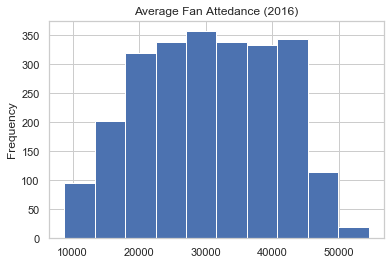

In [31]:
%matplotlib inline
Baseball_Data.Fan_Attendance.plot(kind='hist', title='Average Fan Attedance (2016)')

***Now that I visualized my data and I know roughly where my data falls between I am able to create bins that represent my data well***

In [32]:
Attendance_Bins = list(range(5000, 65000, 10000)) 
Attendance_Bins

[5000, 15000, 25000, 35000, 45000, 55000]

In [33]:
pd.cut(Baseball_Data.Fan_Attendance, Attendance_Bins).head()

0    (35000, 45000]
1    (15000, 25000]
2     (5000, 15000]
3    (15000, 25000]
4    (15000, 25000]
Name: Fan_Attendance, dtype: category
Categories (5, interval[int64]): [(5000, 15000] < (15000, 25000] < (25000, 35000] < (35000, 45000] < (45000, 55000]]

***Now that I created my Fan_Attendance bin, I need to incorporate it into my Baseball_Data Dataset***

In [34]:
Baseball_Data['Fan_Attendance'] = pd.cut(Baseball_Data.Fan_Attendance, bins=Attendance_Bins,
                                         labels=["5000-15000", "15000-25000", "25000-35000", "35000-45000",\
                                                 "45000-55000"])
Baseball_Data.head()

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,0,35000-45000,28,2,14,0,9,4,7,74.0,14.0,6,3.216667,1,1
1,1,15000-25000,23,2,20,0,8,3,3,55.0,24.0,3,2.383333,1,1
2,2,5000-15000,22,2,9,0,9,4,3,48.0,7.0,0,3.183333,1,1
3,3,15000-25000,7,2,30,1,8,1,3,65.0,10.0,4,2.883333,1,0
4,4,15000-25000,12,1,27,0,8,3,3,77.0,0.0,5,2.650000,1,0


***Now that I have incorporated my bin into my dataset, I will run a groupby() function to statistically see where my data falls inbetween***

In [35]:
Baseball_Data.groupby("Fan_Attendance")["Home_Team_Win"].sum()

Fan_Attendance
5000-15000      90
15000-25000    310
25000-35000    397
35000-45000    421
45000-55000     84
Name: Home_Team_Win, dtype: int64

### TEMPERATURE
***I will do the samething exact thing to my Temperature column that I did to my Fan_Attendance Column (See Above for Deatils)***

In [36]:
Baseball_Data.Temperature.mean()

73.81260162601626

In [37]:
Baseball_Data.Temperature.max()

101.0

In [38]:
Baseball_Data.Temperature.min()

31.0

In [39]:
Temperature_Bins = pd.cut(Baseball_Data.Temperature, 10)

Temperature_Bins

0       (73.0, 80.0]
1       (52.0, 59.0]
2       (45.0, 52.0]
3       (59.0, 66.0]
4       (73.0, 80.0]
            ...     
2458    (66.0, 73.0]
2459    (38.0, 45.0]
2460    (59.0, 66.0]
2461    (66.0, 73.0]
2462    (59.0, 66.0]
Name: Temperature, Length: 2460, dtype: category
Categories (10, interval[float64]): [(30.93, 38.0] < (38.0, 45.0] < (45.0, 52.0] < (52.0, 59.0] ... (73.0, 80.0] < (80.0, 87.0] < (87.0, 94.0] < (94.0, 101.0]]

In [40]:
for x in Temperature_Bins.unique():
    print(x)

(73.0, 80.0]
(52.0, 59.0]
(45.0, 52.0]
(59.0, 66.0]
(80.0, 87.0]
(66.0, 73.0]
(38.0, 45.0]
(30.93, 38.0]
(87.0, 94.0]
(94.0, 101.0]


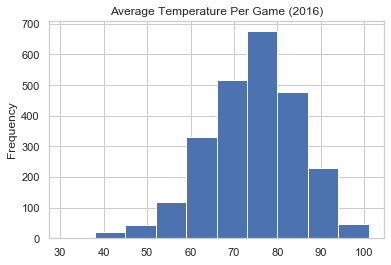

In [41]:
%matplotlib inline
Baseball_Data.Temperature.plot(kind='hist', title='Average Temperature Per Game (2016)')

In [42]:
bins_temperature = list(range(30, 110, 10)) 
bins_temperature 

[30, 40, 50, 60, 70, 80, 90, 100]

In [43]:
pd.cut(Baseball_Data.Temperature, bins_temperature).head()

0    (70, 80]
1    (50, 60]
2    (40, 50]
3    (60, 70]
4    (70, 80]
Name: Temperature, dtype: category
Categories (7, interval[int64]): [(30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [44]:
Baseball_Data['Temperature'] = pd.cut(Baseball_Data.Temperature, bins=bins_temperature,
                                         labels=["30-40", "40-50", "50-60", "60-70", "70-80",\
                                                 "80-90", "90-100"])
Baseball_Data.head()

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,0,35000-45000,28,2,14,0,9,4,7,70-80,14.0,6,3.216667,1,1
1,1,15000-25000,23,2,20,0,8,3,3,50-60,24.0,3,2.383333,1,1
2,2,5000-15000,22,2,9,0,9,4,3,40-50,7.0,0,3.183333,1,1
3,3,15000-25000,7,2,30,1,8,1,3,60-70,10.0,4,2.883333,1,0
4,4,15000-25000,12,1,27,0,8,3,3,70-80,0.0,5,2.650000,1,0


In [45]:
Baseball_Data.groupby("Temperature")["Home_Team_Win"].sum()

Temperature
30-40       6
40-50      34
50-60     100
60-70     281
70-80     523
80-90     291
90-100     67
Name: Home_Team_Win, dtype: int64

#### Fixing Bin Colmumns 
***Now that I created two bins for Fan_Attendance and Temperature I need to switch the data into numerical values so I will be able to run a regression***

In [46]:
cleanup_nums = {"Temperature" : {"30-40": 0, "40-50": 1, "50-60": 2, "60-70": 3, "70-80": 4, "80-90":5, "90-100": 6},
                "Fan_Attendance" : {"5000-15000": 0, "15000-25000": 1, "25000-35000": 2, "35000-45000": 3,
                                 "45000-55000": 4, "55000-65000":8}              

    
               } 
cleanup_nums

{'Temperature': {'30-40': 0,
  '40-50': 1,
  '50-60': 2,
  '60-70': 3,
  '70-80': 4,
  '80-90': 5,
  '90-100': 6},
 'Fan_Attendance': {'5000-15000': 0,
  '15000-25000': 1,
  '25000-35000': 2,
  '35000-45000': 3,
  '45000-55000': 4,
  '55000-65000': 8}}

In [47]:
Baseball_Data.replace(cleanup_nums, inplace=True)

Baseball_Data.head()

,Unnamed: 0,Fan_Attendance,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
0,0,3,28,2,14,0,9,4,7,4.0,14.0,6,3.216667,1,1
1,1,1,23,2,20,0,8,3,3,2.0,24.0,3,2.383333,1,1
2,2,0,22,2,9,0,9,4,3,1.0,7.0,0,3.183333,1,1
3,3,1,7,2,30,1,8,1,3,3.0,10.0,4,2.883333,1,0
4,4,1,12,1,27,0,8,3,3,4.0,0.0,5,2.650000,1,0


## IMPORTANT 
***Below, you will find a legend to the data points that I reassigned...***

- Temperature
    - 30-40: 0
    - 40-50: 1
    - 50-60: 2
    - 60-70: 3
    - 70-80: 4
    - 80-90:5
    - 90-100: 6
    
    
- Fan_Attendance
    - 5000-15000: 0
    - 15000-25000: 1
    - 25000-35000: 2
    - 35000-45000: 3
    - 45000-55000: 4
    - 55000-65000: 8

## EXPLORATORY DATA ANALYSIS (25 points)

***My Goal is to run a Linear Regression on Fan_Attendance for the 2016 Baseball Season and find whether or nor temperature and weather patterns play a significant role in how many fans attend a game***

***Before I do that I want to visualize my data and make sure that it is somehwhat linear before I proceed.***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A771237588>,
      dtype=object)

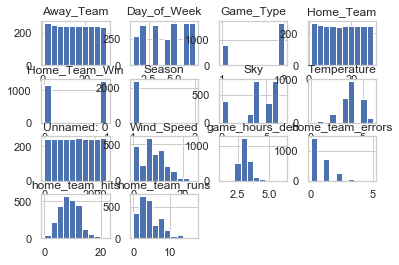

In [48]:
Baseball_Data.hist()

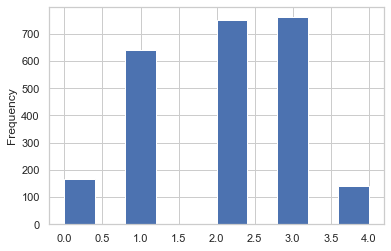

In [49]:
Baseball_Data.Fan_Attendance.plot(kind="hist")

***Considering that this is a real-world dataset, it is safe to assume that the data is linear based off of the graph below.***


***Important Note - I plotted the Updated_Data Dataset and not the Baseball_Data Dataset since I made Fan_Attendance into bins***

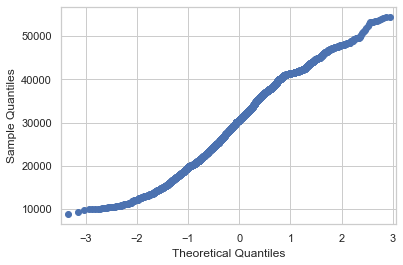

In [50]:
import statsmodels.api as sm
sm.qqplot(Updated_Data.Fan_Attendance, line="s")
plt.show()

***Changed Dataset name to 'df' to make code cleaner for regression***

In [51]:
df = Baseball_Data

In [52]:
df.describe()

,Unnamed: 0,Away_Team,Game_Type,Home_Team,home_team_errors,home_team_hits,home_team_runs,Day_of_Week,Temperature,Wind_Speed,Sky,game_hours_dec,Season,Home_Team_Win
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2459.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,1230.933740,15.320325,1.676423,15.328455,0.586179,8.611382,4.520325,4.164228,3.845872,7.488211,4.018293,3.085352,1.014228,0.529268
std,711.090637,8.708127,0.467936,8.720424,0.805817,3.438679,3.112502,1.997116,1.088550,5.054428,2.036888,0.460671,0.118452,0.499244
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.250000,1.000000,0.000000
25%,615.750000,8.000000,1.000000,8.000000,0.000000,6.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.783333,1.000000,0.000000
50%,1230.500000,15.000000,2.000000,15.000000,0.000000,8.000000,4.000000,4.000000,4.000000,7.000000,4.000000,3.033333,1.000000,1.000000
75%,1846.250000,23.000000,2.000000,23.000000,1.000000,11.000000,6.000000,6.000000,5.000000,11.000000,6.000000,3.316667,1.000000,1.000000
max,2462.000000,30.000000,2.000000,30.000000,5.000000,22.000000,17.000000,7.000000,6.000000,25.000000,7.000000,6.216667,2.000000,1.000000


***Before I run my regression, I want to visualize this correlation chart to see what variables are the best to use***

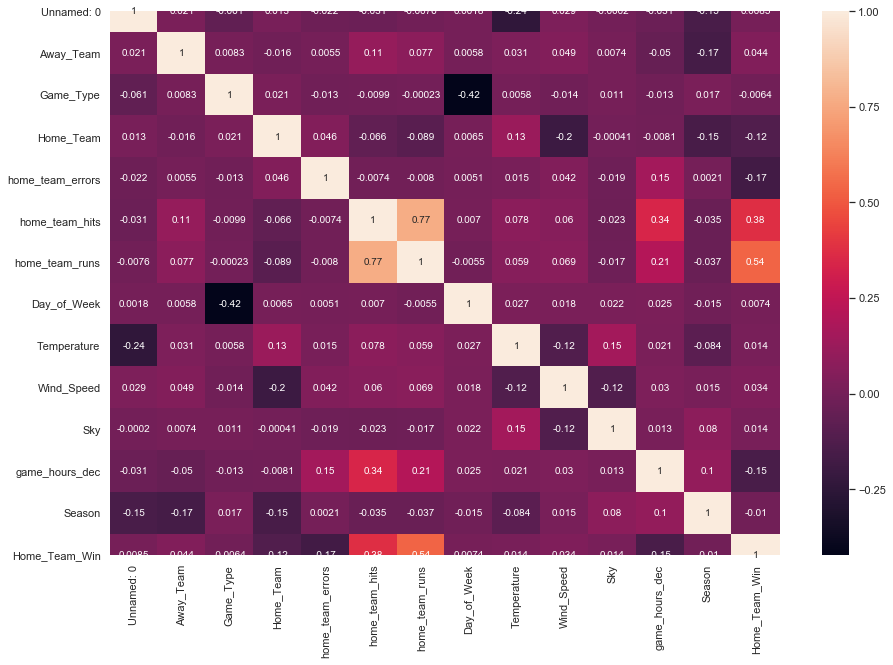

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

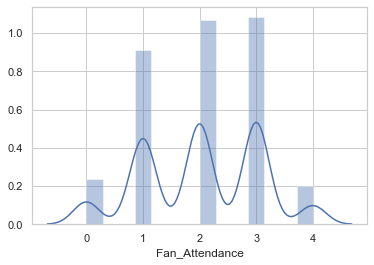

In [54]:
import seaborn as sns
sns.distplot(df.Fan_Attendance)

## LINEAR REGRESSION

***Based off the previous visualizations and the variable's definitions I have decided to use the day of week, the wind speed, whether the game is regular season or playoffs, and a brief description of the weather.***

In [55]:
feature_cols_1 = ["Day_of_Week", "Wind_Speed", "Season", "Sky"]
x_lin = df[feature_cols_1] # Features
y_lin = df.Fan_Attendance # Target variable

***Next is to split data into a training set and a testing set***

In [56]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[["Day_of_Week", "Wind_Speed", "Season", "Sky"]], 
                                                 df.Fan_Attendance,
                                                test_size = 0.3)

***Next is to import the linear regression***

In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

***Next we have to fit the model to our dataset***

In [58]:
lm.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Now that the model is created and we trained it in the previous section now we have to test the model with our testing dataset***

In [59]:
y_pred = lm.predict(xTest)
y_pred

array([1.63268993, 2.65774226, 1.79675517, 2.47321448, 1.71460661,
       3.03240574, 1.48868998, 1.7244739 , 2.38215848, 1.86824196,
       1.93956339, 1.91989534, 2.26928285, 1.66318512, 1.87810925,
       1.6334179 , 1.9296961 , 1.80662246, 2.25829035, 2.33964442,
       1.60156562, 1.56097126, 2.0116793 , 2.00164666, 1.50954977,
       2.0732988 , 2.18657168, 2.47377708, 1.48908723, 1.93956339,
       1.81665511, 2.15640721, 1.92953074, 2.21673614, 2.35143141,
       2.00181201, 1.63268993, 2.51413956, 1.81665511, 1.91966345,
       1.75520097, 2.20710074, 1.41736856, 2.0116793 , 1.78592804,
       1.80678782, 1.90963081, 2.2592502 , 2.45252006, 1.91989534,
       2.28885206, 2.53466862, 1.99098488, 2.12568014, 2.44248741,
       2.00277186, 1.63268993, 2.155282  , 1.63245805, 2.27819028,
       2.23759593, 1.93032523, 2.47337984, 1.63229269, 1.77629263,
       2.47321448, 1.34548453, 2.06349804, 2.44265277, 2.44361262,
       2.52480133, 1.68387954, 1.63229269, 2.38119863, 1.30545

#### By taking the mean I am able to say that 2.0145 or roughly around 25,000 fans attend games

In [60]:
y_pred.mean()

2.0442968750680324

### Now that I created a model, I want to get the linear regression equation from the model 

***My R-SQUARED value***

In [61]:
lm.score(x_lin,y_lin)

0.11459353153408491

***My coefficients***

In [62]:
lm.coef_

array([0.1436027 , 0.03072707, 1.3997158 , 0.02029718])

***My y-intercept***

In [63]:
lm.intercept_

-0.299319871359117

###### My Linear Regression Formula 


*= 0.1342(Day_of_Week) + 0.0298(Wind_Speed) + 1.247(Season) + 0.0117(Sky) - 0.072*



        - At a quick glance, I was surprised to see that the Sky Variable didn not yeilded a more significant correlation    but then I looked at the dataset again an realized that Baseball is subjected to rain outs and will not play in bad      weather like other sports
        
        
        - It also does not catch me by surprised that more people tend to attend playoff games than regular season games
        
        
        - The wind speed was the one variable that I hoped would find a correlation but instead found an insiginifcant one
        
        
        - The regression found a healthy correlation with Day_of_Week; again this does not surprise me because people tend    to go out more towards the end of the week and not in the beginning of the week. 
        



*R-SQUARED=0.1269*



        - I was surprised to see that the R-SQUARED value was so low, I was hoping for a value close to .6
        
        
        - I am also surprised that there is not a significant correleation to weather and Fan Attendance at Baseball Games



## LOGISTIC REGRESSION

***As an extra efort, I also want to analyse the variable Home_Team_Win and what we can conclude about teams who win.***

In [64]:
feature_cols_2 = ["home_team_errors", "home_team_hits", "home_team_runs", "game_hours_dec"]
x_log = Updated_Data[feature_cols_2] # Features
y_log = Updated_Data.Home_Team_Win # Target variable

***Next is to split data into a training set and a testing set***

In [65]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(Updated_Data[["home_team_errors", "home_team_hits", "home_team_runs",
                                                              "game_hours_dec"]], 
                                                 Updated_Data.Home_Team_Win,
                                                test_size = 0.3)

***Next is to import the logistic regression***

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

***Next we have to fit the model to our dataset***

In [67]:
logreg.fit(xTrain,yTrain)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

***Now that the model is created and we trained it in the previous section now we have to test the model with our testing dataset***

In [68]:
y_pred=logreg.predict(xTest)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,

***Next step is to import the data above as a matrix***

In [69]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(yTest, y_pred)
cnf_matrix

array([[269,  86],
       [ 80, 304]], dtype=int64)

***To better undersatnd the matrix, I visualize it so it will look better***

Text(0.5, 257.44, 'Predicted')

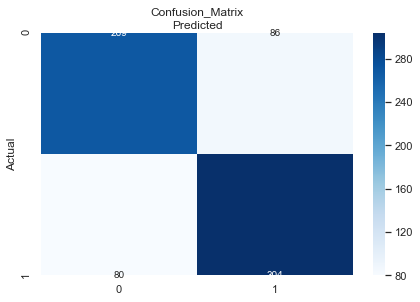

In [70]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt="")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion_Matrix', y=1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

***After visualizing, I will take the accuracy and the precision rate of the model***

In [71]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred))
print("Precision:",metrics.precision_score(yTest, y_pred))
print("Recall:",metrics.recall_score(yTest, y_pred))

Accuracy: 0.7753721244925575
Precision: 0.7794871794871795
Recall: 0.7916666666666666


***Now that I have the precision rate, I want to visualize it to see it better***

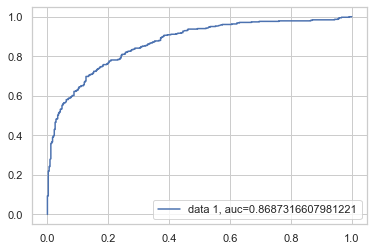

In [72]:
y_pred_proba = logreg.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba)
auc = metrics.roc_auc_score(yTest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## CONCLUSION (40 points)

***In this final section, you should draw conclusions based on your analysis. Each of your conclusion should be supported with visualizations and pvalues and any other appropriate measurments for your dataset.***

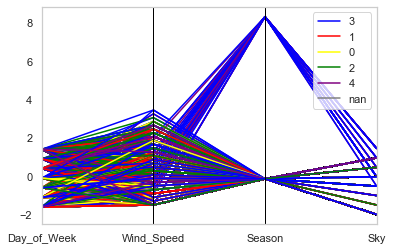

In [73]:
# Scaling attribute values to avoid few outiers
cols = ["Day_of_Week", "Wind_Speed", "Season", "Sky"]
subset_df = df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, df['Fan_Attendance']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'Fan_Attendance', color=('Blue', 'Red', 'Yellow', "Green", 'Purple', 'Grey'))

### Conlusion #1

- Based off the graph above and graph 1 below, my first conclusion from this dataset is that there is a strong linear relationship between Fan Attendance for Baseball Games and whether or not is it the Regular Season or Postseason

### Conlusion #2

- Based off the graph above and the graph 2 below, my first conclusion from this dataset is that there is a strong linear relationship betweenMy second conclusion from this dataset is that there is a strong linear relationship between Fan Attendance for Baseball Games and what day of the week it is

### Conlusion #3

- Based off the graph above, it is safe to say that when Baseball games are plpayed in the beginning of the week like on a Monday and Tuesday there is less of Fan Attendance than those played on Friday, Saturday, or Sunday.

***Graph#1***

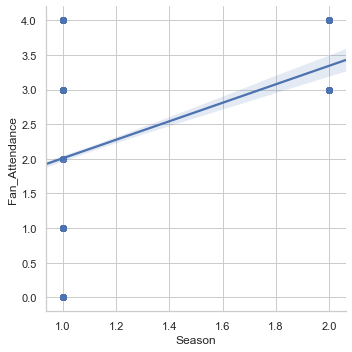

In [74]:
sns.lmplot(x="Season", y="Fan_Attendance", data=df)

***Graph#2***

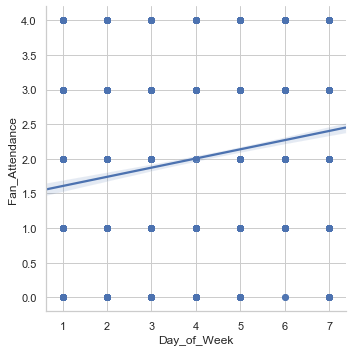

In [75]:
sns.lmplot(x="Day_of_Week", y="Fan_Attendance", data=df)

### Conlusion #4

In [76]:
print("Accuracy:",metrics.accuracy_score(yTest, y_pred))
print("Precision:",metrics.precision_score(yTest, y_pred))
print("Recall:",metrics.recall_score(yTest, y_pred))

Accuracy: 0.7753721244925575
Precision: 0.7794871794871795
Recall: 0.7916666666666666


***Based off my accuracy rate of .81, it is safe to assume that my logisitc regression model is a good fit within the data***

Text(0.5, 257.44, 'Predicted')

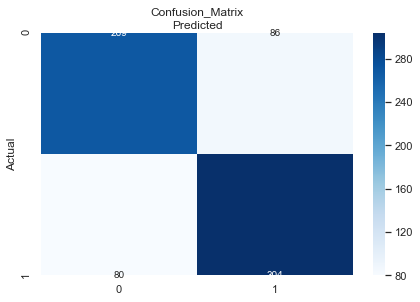

In [77]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt="")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion_Matrix', y=1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

***Based off the confusion matrix above, the model was able to predict 277 times a team won when they actually won and they were able to predict 221 times when a team loss when they actually lost.***

***On the otherhand, 91 times the model predicted the the home_team to win when they actually lost, and 50 times the model predicted the home_team to lose when they actually win***

***If I would be able to incorporate data from past MLB seasons, I beleive that my model would be a better fit and would laso have a higher accuracy and precision rate***

In [78]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(xTrain,yTrain)
predictions = logmodel.predict(xTest)

from sklearn.metrics import classification_report


print(classification_report(yTrain,predictions))

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1724, 739]

In [ ]:
from sklearn.metrics import classification_report
target_names = ["home_team_errors", "home_team_hits", "home_team_runs", "game_hours_dec"]
print(classification_report(Updated_Data['Home_Team_Win'], y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

logreg = LogisticRegression()

logreg.fit(xTest, yTest)

predicted_wins = model.predict(xTest)

accuracy = accuracy_score(yTest,predicted_wins)

parameters = model.coef_